In [2]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols



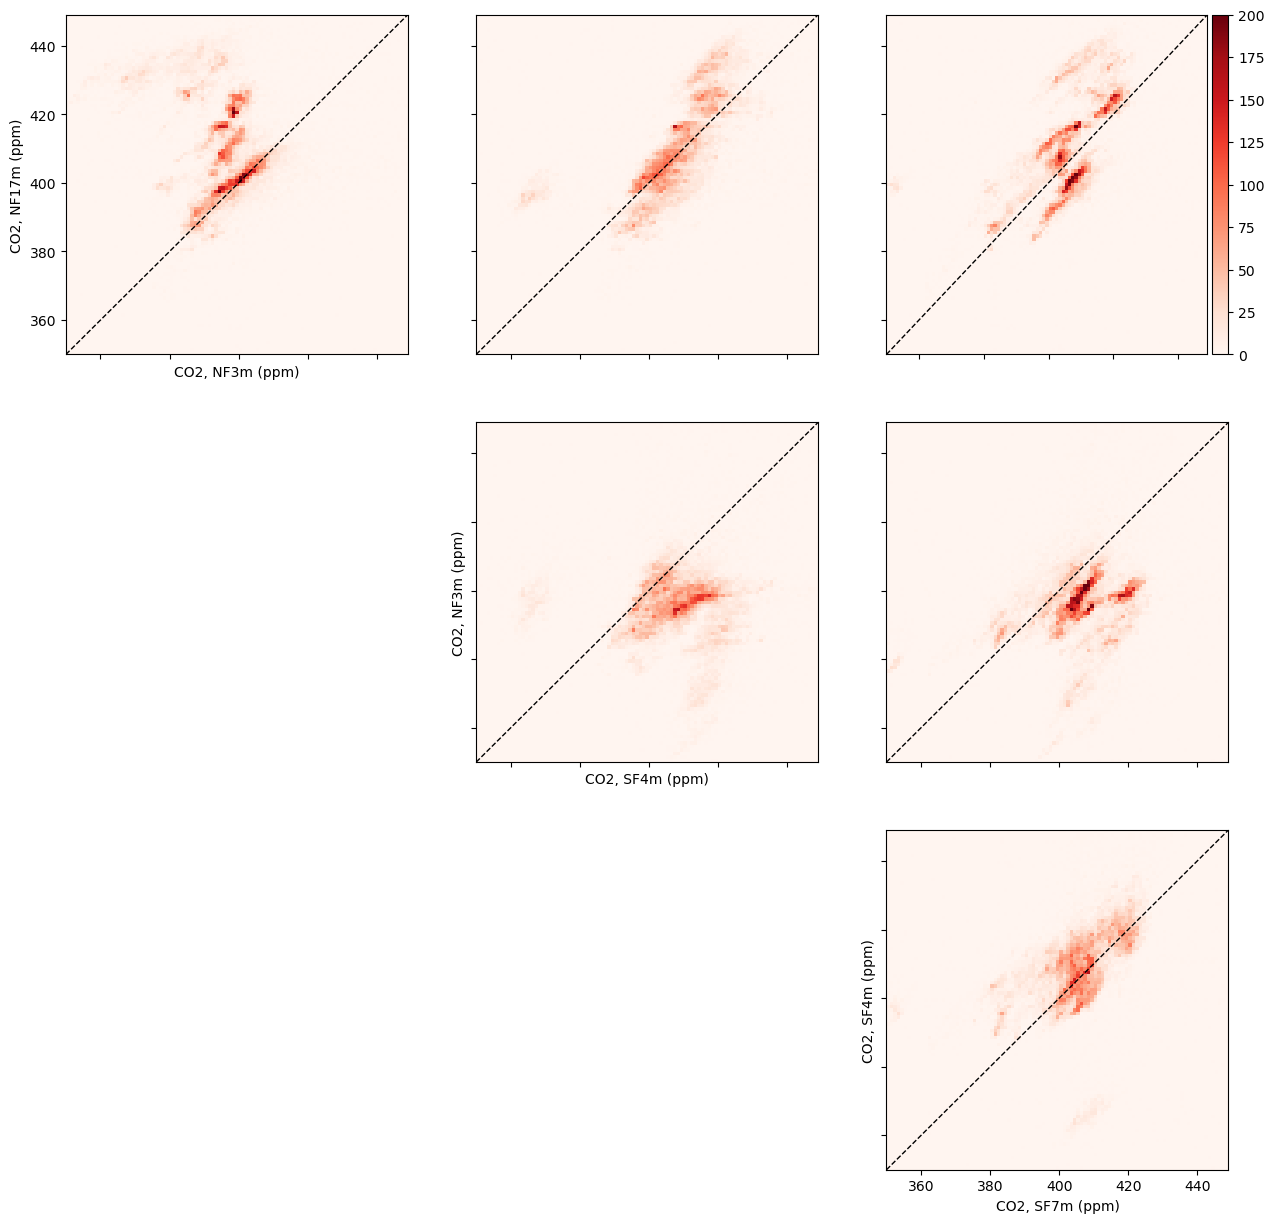

In [82]:
postfire_dir = Path('/project/bbtrees/afox18/Platinum-EddyPro7/ExpectedOutputs/Chimney/All_CP')

nf17 = pd.concat([
    pd.read_csv(f, na_values=-9999, skiprows=[0, 2])
    for f in postfire_dir.glob("BB-NF-17m*/*full_output*.csv")
])
nf17["TIMESTAMP"] = pd.to_datetime(nf17["date"] + " " + nf17["time"])

nf3 = pd.concat([
    pd.read_csv(f, na_values=-9999, skiprows=[0, 2])
    for f in postfire_dir.glob("BB-NF-3m*/*full_output*.csv")
])
nf3["TIMESTAMP"] = pd.to_datetime(nf3["date"] + " " + nf3["time"])

sf7 = pd.concat([
    pd.read_csv(f, na_values=-9999, skiprows=[0, 2])
    for f in postfire_dir.glob("BB-SF-7m*/*full_output*.csv")
])
sf7["TIMESTAMP"] = pd.to_datetime(sf7["date"] + " " + sf7["time"])

sf4 = pd.concat([
    pd.read_csv(f, na_values=-9999, skiprows=[0, 2])
    for f in postfire_dir.glob("BB-SF-4m*/*full_output*.csv")
])
sf4["TIMESTAMP"] = pd.to_datetime(sf4["date"] + " " + sf4["time"])


merged = (
    nf17[["TIMESTAMP", 'co2_mole_fraction']]
    .merge(nf3[["TIMESTAMP", 'co2_mole_fraction']], on="TIMESTAMP", how="inner", suffixes=["_nf17", "_nf3"])
    .merge(sf4[["TIMESTAMP", 'co2_mole_fraction']], on="TIMESTAMP", how="inner")
    .merge(sf7[["TIMESTAMP", 'co2_mole_fraction']], on="TIMESTAMP", how="inner", suffixes=["_sf4", "_sf7"])
    .set_index("TIMESTAMP")
    .dropna()
)

# y = 2024
# merged = merged.loc[(merged.index.year == y)]

fig, axs = plt.subplots(3, 3, figsize=(15, 15), sharey="row", sharex="col")
s=1
axs[0, 0].hist2d(merged["co2_mole_fraction_nf3"], merged["co2_mole_fraction_nf17"], bins=np.arange(350, 450), cmap="Reds", vmin=0, vmax=200)
axs[0, 1].hist2d(merged["co2_mole_fraction_sf4"], merged["co2_mole_fraction_nf17"], bins=np.arange(350, 450), cmap="Reds", vmin=0, vmax=200)
ax_for_cbar = axs[0, 2].hist2d(merged["co2_mole_fraction_sf7"], merged["co2_mole_fraction_nf17"], bins=np.arange(350, 450), cmap="Reds", vmin=0, vmax=200)
axs[0, 0].set_ylabel("CO2, NF17m (ppm)")
axs[0, 0].set_xlabel("CO2, NF3m (ppm)")

axs[1, 1].hist2d(merged["co2_mole_fraction_sf4"], merged["co2_mole_fraction_nf3"], bins=np.arange(350, 450), cmap="Reds", vmin=0, vmax=200)
ax_for_cbar = axs[1, 2].hist2d(merged["co2_mole_fraction_sf7"], merged["co2_mole_fraction_nf3"], bins=np.arange(350, 450), cmap="Reds", vmin=0, vmax=200)
axs[1, 1].set_ylabel("CO2, NF3m (ppm)")
axs[1, 1].set_xlabel("CO2, SF4m (ppm)")

axs[2, 2].hist2d(merged["co2_mole_fraction_sf7"], merged["co2_mole_fraction_sf4"], bins=np.arange(350, 450), cmap="Reds", vmin=0, vmax=200)
axs[2, 2].set_ylabel("CO2, SF4m (ppm)")
axs[2, 2].set_xlabel("CO2, SF7m (ppm)")

axs[1, 0].axis("off")
axs[2, 0].axis("off")
axs[2, 1].axis("off")

for i in range(3):
    for j in range(3):
        if j >= i:
            axs[i, j].plot([350, 450], [350, 450], "k--", lw=1)

divider = make_axes_locatable(axs[0, -1])
cax = divider.append_axes('right', size='5%', pad=0.05)

fig.colorbar(ax_for_cbar[3], cax=cax, orientation='vertical')

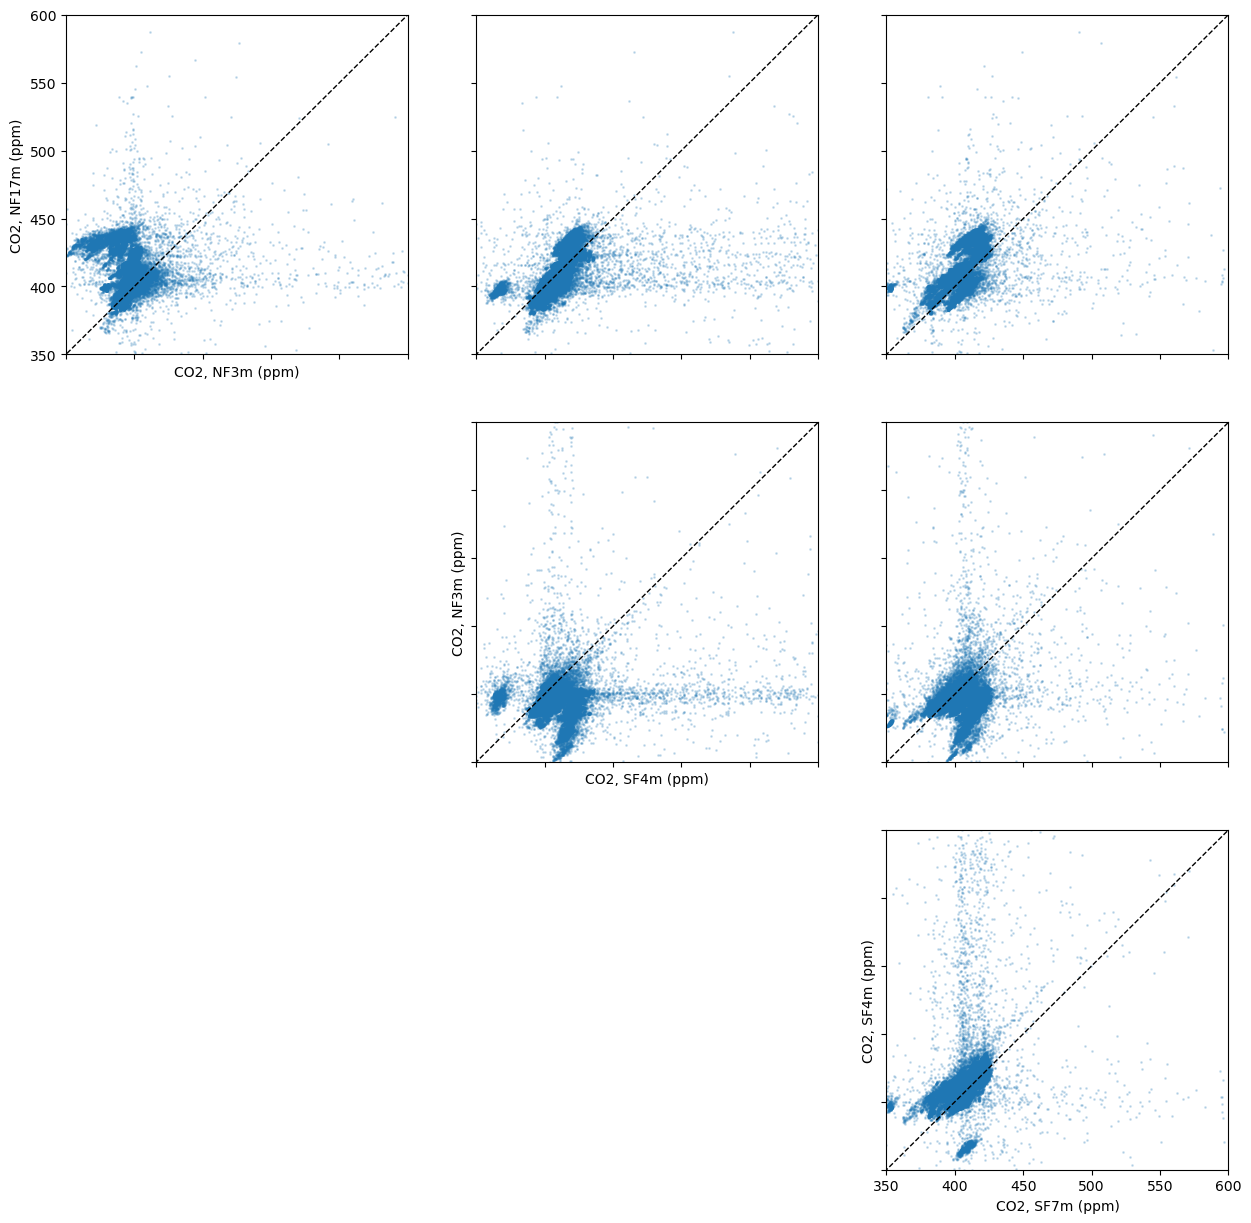

In [26]:
postfire_dir = Path('/project/bbtrees/afox18/Platinum-EddyPro7/ExpectedOutputs/Chimney/All_CP')

nf17 = pd.concat([
    pd.read_csv(f, na_values=-9999, skiprows=[0, 2])
    for f in postfire_dir.glob("BB-NF-17m*/*full_output*.csv")
])
nf17["TIMESTAMP"] = pd.to_datetime(nf17["date"] + " " + nf17["time"])

nf3 = pd.concat([
    pd.read_csv(f, na_values=-9999, skiprows=[0, 2])
    for f in postfire_dir.glob("BB-NF-3m*/*full_output*.csv")
])
nf3["TIMESTAMP"] = pd.to_datetime(nf3["date"] + " " + nf3["time"])

sf7 = pd.concat([
    pd.read_csv(f, na_values=-9999, skiprows=[0, 2])
    for f in postfire_dir.glob("BB-SF-7m*/*full_output*.csv")
])
sf7["TIMESTAMP"] = pd.to_datetime(sf7["date"] + " " + sf7["time"])

sf4 = pd.concat([
    pd.read_csv(f, na_values=-9999, skiprows=[0, 2])
    for f in postfire_dir.glob("BB-SF-4m*/*full_output*.csv")
])
sf4["TIMESTAMP"] = pd.to_datetime(sf4["date"] + " " + sf4["time"])


merged = (
    nf17[["TIMESTAMP", 'co2_mole_fraction']]
    .merge(nf3[["TIMESTAMP", 'co2_mole_fraction']], on="TIMESTAMP", how="inner", suffixes=["_nf17", "_nf3"])
    .merge(sf4[["TIMESTAMP", 'co2_mole_fraction']], on="TIMESTAMP", how="inner")
    .merge(sf7[["TIMESTAMP", 'co2_mole_fraction']], on="TIMESTAMP", how="inner", suffixes=["_sf4", "_sf7"])
    .set_index("TIMESTAMP")
    .dropna()
)

# y = 2024
# merged = merged.loc[(merged.index.year == y)]

fig, axs = plt.subplots(3, 3, figsize=(15, 15), sharey="row", sharex="col")
s=1
a=0.2
axs[0, 0].scatter(merged["co2_mole_fraction_nf3"], merged["co2_mole_fraction_nf17"], s=s, alpha=a)
axs[0, 1].scatter(merged["co2_mole_fraction_sf4"], merged["co2_mole_fraction_nf17"], s=s, alpha=a)
ax_for_cbar = axs[0, 2].scatter(merged["co2_mole_fraction_sf7"], merged["co2_mole_fraction_nf17"], s=s, alpha=a)
axs[0, 0].set_ylabel("CO2, NF17m (ppm)")
axs[0, 0].set_xlabel("CO2, NF3m (ppm)")

axs[1, 1].scatter(merged["co2_mole_fraction_sf4"], merged["co2_mole_fraction_nf3"], s=s, alpha=a)
ax_for_cbar = axs[1, 2].scatter(merged["co2_mole_fraction_sf7"], merged["co2_mole_fraction_nf3"], s=s, alpha=a)
axs[1, 1].set_ylabel("CO2, NF3m (ppm)")
axs[1, 1].set_xlabel("CO2, SF4m (ppm)")

axs[2, 2].scatter(merged["co2_mole_fraction_sf7"], merged["co2_mole_fraction_sf4"], s=s, alpha=a)
axs[2, 2].set_ylabel("CO2, SF4m (ppm)")
axs[2, 2].set_xlabel("CO2, SF7m (ppm)")

axs[1, 0].axis("off")
axs[2, 0].axis("off")
axs[2, 1].axis("off")

for i in range(3):
    for j in range(3):
        if j >= i:
            axs[i, j].plot([200, 800], [200, 800], "k--", lw=1)
            axs[i, j].set_xlim(350, 600)
            axs[i, j].set_ylim(350, 600)

# divider = make_axes_locatable(axs[0, -1])
# cax = divider.append_axes('right', size='5%', pad=0.05)

# fig.colorbar(ax_for_cbar[3], cax=cax, orientation='vertical')

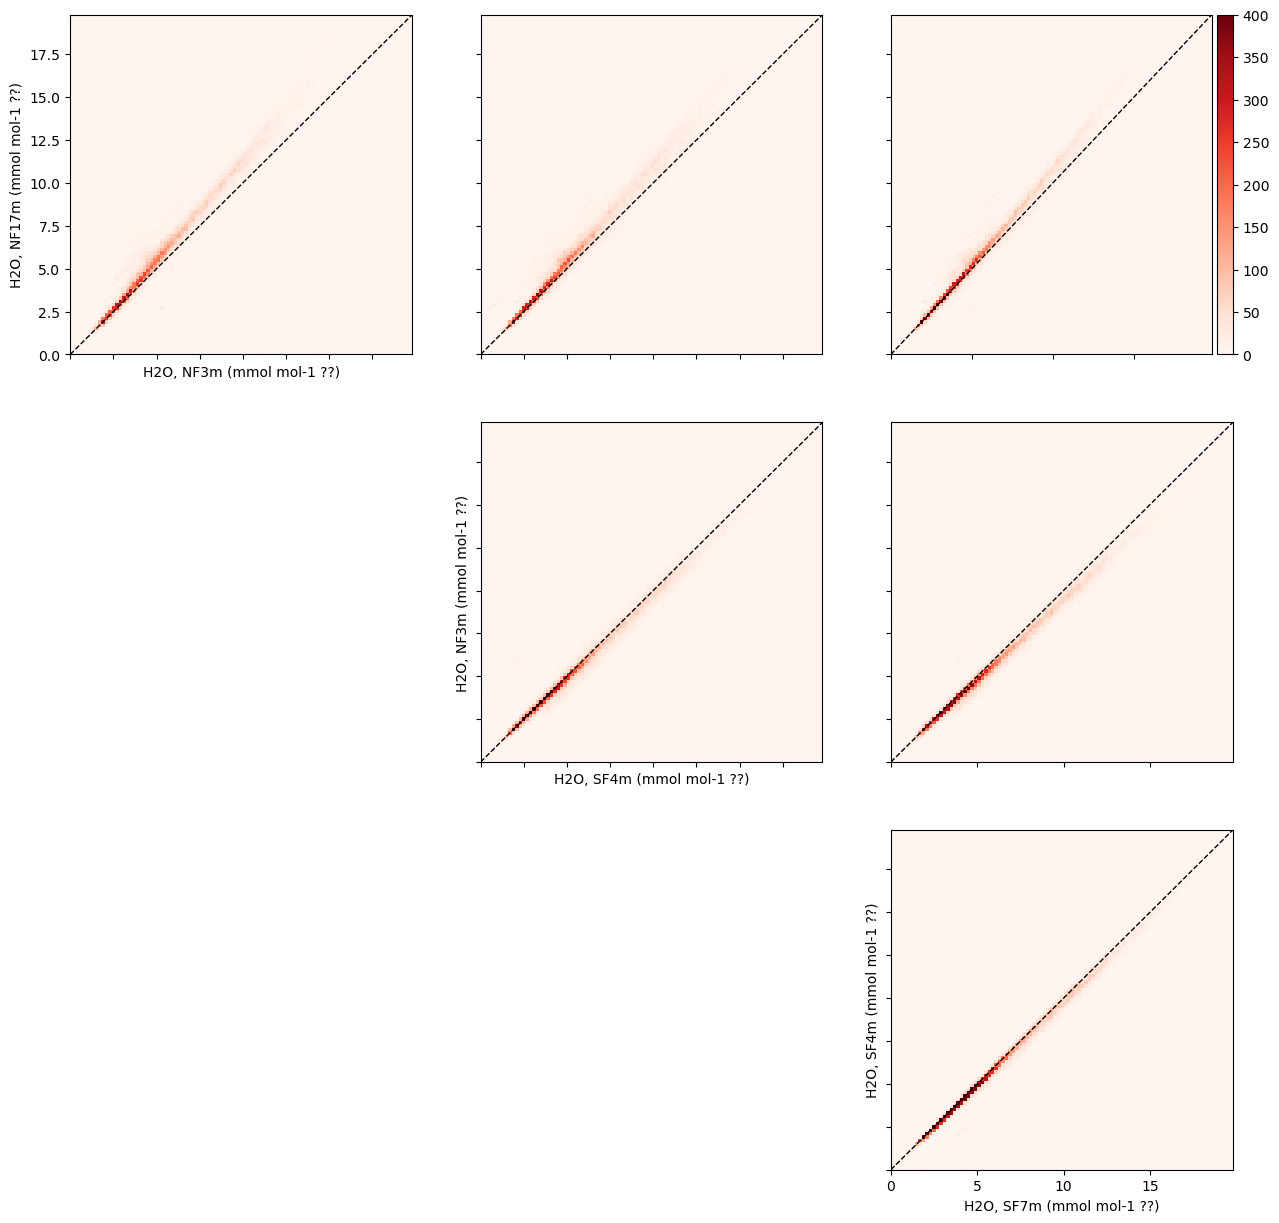

In [19]:
postfire_dir = Path('/project/bbtrees/afox18/Platinum-EddyPro7/ExpectedOutputs/Chimney/All_CP')

nf17 = pd.concat([
    pd.read_csv(f, na_values=-9999, skiprows=[0, 2])
    for f in postfire_dir.glob("BB-NF-17m*/*full_output*.csv")
])
nf17["TIMESTAMP"] = pd.to_datetime(nf17["date"] + " " + nf17["time"])

nf3 = pd.concat([
    pd.read_csv(f, na_values=-9999, skiprows=[0, 2])
    for f in postfire_dir.glob("BB-NF-3m*/*full_output*.csv")
])
nf3["TIMESTAMP"] = pd.to_datetime(nf3["date"] + " " + nf3["time"])

sf7 = pd.concat([
    pd.read_csv(f, na_values=-9999, skiprows=[0, 2])
    for f in postfire_dir.glob("BB-SF-7m*/*full_output*.csv")
])
sf7["TIMESTAMP"] = pd.to_datetime(sf7["date"] + " " + sf7["time"])

sf4 = pd.concat([
    pd.read_csv(f, na_values=-9999, skiprows=[0, 2])
    for f in postfire_dir.glob("BB-SF-4m*/*full_output*.csv")
])
sf4["TIMESTAMP"] = pd.to_datetime(sf4["date"] + " " + sf4["time"])


merged = (
    nf17[["TIMESTAMP", 'h2o_mole_fraction']]
    .merge(nf3[["TIMESTAMP", 'h2o_mole_fraction']], on="TIMESTAMP", how="inner", suffixes=["_nf17", "_nf3"])
    .merge(sf4[["TIMESTAMP", 'h2o_mole_fraction']], on="TIMESTAMP", how="inner")
    .merge(sf7[["TIMESTAMP", 'h2o_mole_fraction']], on="TIMESTAMP", how="inner", suffixes=["_sf4", "_sf7"])
    .set_index("TIMESTAMP")
    .dropna()
)

# y = 2024
# merged = merged.loc[(merged.index.year == y)]

fig, axs = plt.subplots(3, 3, figsize=(15, 15), sharey="row", sharex="col")
s=1
axs[0, 0].hist2d(merged["h2o_mole_fraction_nf3"], merged["h2o_mole_fraction_nf17"], bins=np.arange(0, 20, 0.2), cmap="Reds", vmin=0, vmax=400)
axs[0, 1].hist2d(merged["h2o_mole_fraction_sf4"], merged["h2o_mole_fraction_nf17"], bins=np.arange(0, 20, 0.2), cmap="Reds", vmin=0, vmax=400)
ax_for_cbar = axs[0, 2].hist2d(merged["h2o_mole_fraction_sf7"], merged["h2o_mole_fraction_nf17"], bins=np.arange(0, 20, 0.2), cmap="Reds", vmin=0, vmax=400)
axs[0, 0].set_ylabel("H2O, NF17m (mmol mol-1 ??)")
axs[0, 0].set_xlabel("H2O, NF3m (mmol mol-1 ??)")

axs[1, 1].hist2d(merged["h2o_mole_fraction_sf4"], merged["h2o_mole_fraction_nf3"], bins=np.arange(0, 20, 0.2), cmap="Reds", vmin=0, vmax=400)
ax_for_cbar = axs[1, 2].hist2d(merged["h2o_mole_fraction_sf7"], merged["h2o_mole_fraction_nf3"], bins=np.arange(0, 20, 0.2), cmap="Reds", vmin=0, vmax=400)
axs[1, 1].set_ylabel("H2O, NF3m (mmol mol-1 ??)")
axs[1, 1].set_xlabel("H2O, SF4m (mmol mol-1 ??)")

axs[2, 2].hist2d(merged["h2o_mole_fraction_sf7"], merged["h2o_mole_fraction_sf4"], bins=np.arange(0, 20, 0.2), cmap="Reds", vmin=0, vmax=400)
axs[2, 2].set_ylabel("H2O, SF4m (mmol mol-1 ??)")
axs[2, 2].set_xlabel("H2O, SF7m (mmol mol-1 ??)")

axs[1, 0].axis("off")
axs[2, 0].axis("off")
axs[2, 1].axis("off")

for i in range(3):
    for j in range(3):
        if j >= i:
            axs[i, j].plot([0, 20], [0, 20], "k--", lw=1)

divider = make_axes_locatable(axs[0, -1])
cax = divider.append_axes('right', size='5%', pad=0.05)

fig.colorbar(ax_for_cbar[3], cax=cax, orientation='vertical')

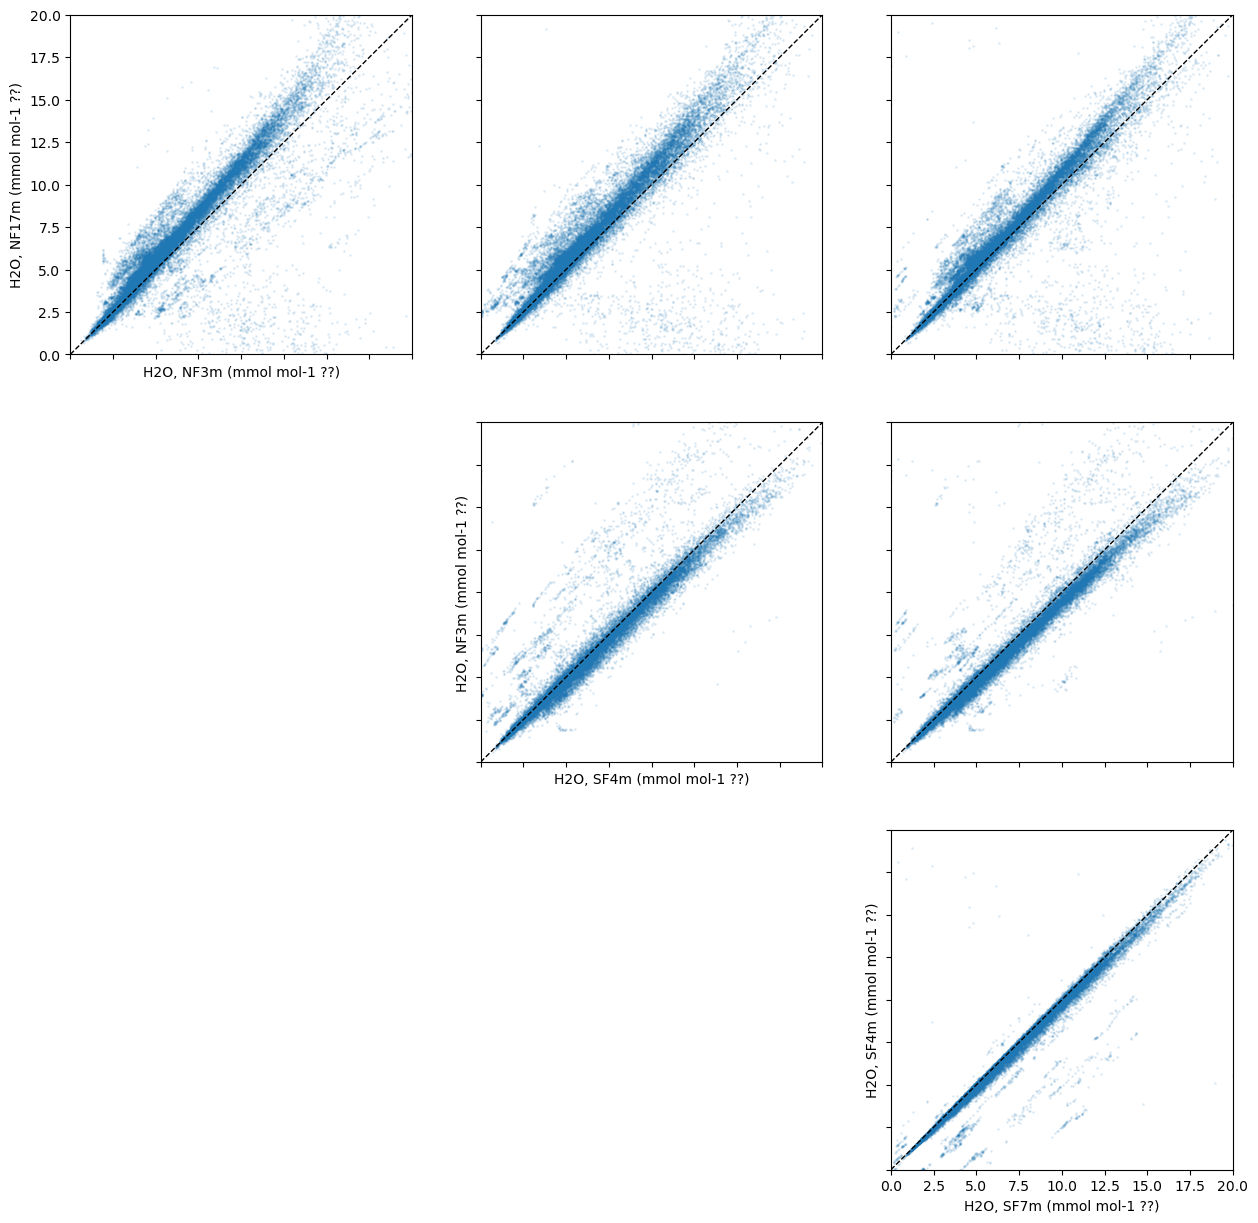

In [28]:
postfire_dir = Path('/project/bbtrees/afox18/Platinum-EddyPro7/ExpectedOutputs/Chimney/All_CP')

nf17 = pd.concat([
    pd.read_csv(f, na_values=-9999, skiprows=[0, 2])
    for f in postfire_dir.glob("BB-NF-17m*/*full_output*.csv")
])
nf17["TIMESTAMP"] = pd.to_datetime(nf17["date"] + " " + nf17["time"])

nf3 = pd.concat([
    pd.read_csv(f, na_values=-9999, skiprows=[0, 2])
    for f in postfire_dir.glob("BB-NF-3m*/*full_output*.csv")
])
nf3["TIMESTAMP"] = pd.to_datetime(nf3["date"] + " " + nf3["time"])

sf7 = pd.concat([
    pd.read_csv(f, na_values=-9999, skiprows=[0, 2])
    for f in postfire_dir.glob("BB-SF-7m*/*full_output*.csv")
])
sf7["TIMESTAMP"] = pd.to_datetime(sf7["date"] + " " + sf7["time"])

sf4 = pd.concat([
    pd.read_csv(f, na_values=-9999, skiprows=[0, 2])
    for f in postfire_dir.glob("BB-SF-4m*/*full_output*.csv")
])
sf4["TIMESTAMP"] = pd.to_datetime(sf4["date"] + " " + sf4["time"])


merged = (
    nf17[["TIMESTAMP", 'h2o_mole_fraction']]
    .merge(nf3[["TIMESTAMP", 'h2o_mole_fraction']], on="TIMESTAMP", how="inner", suffixes=["_nf17", "_nf3"])
    .merge(sf4[["TIMESTAMP", 'h2o_mole_fraction']], on="TIMESTAMP", how="inner")
    .merge(sf7[["TIMESTAMP", 'h2o_mole_fraction']], on="TIMESTAMP", how="inner", suffixes=["_sf4", "_sf7"])
    .set_index("TIMESTAMP")
    .dropna()
)

# y = 2024
# merged = merged.loc[(merged.index.year == y)]

fig, axs = plt.subplots(3, 3, figsize=(15, 15), sharey="row", sharex="col")
s=1
a=0.1
axs[0, 0].scatter(merged["h2o_mole_fraction_nf3"], merged["h2o_mole_fraction_nf17"], s=s, alpha=a)
axs[0, 1].scatter(merged["h2o_mole_fraction_sf4"], merged["h2o_mole_fraction_nf17"], s=s, alpha=a)
ax_for_cbar = axs[0, 2].scatter(merged["h2o_mole_fraction_sf7"], merged["h2o_mole_fraction_nf17"], s=s, alpha=a)
axs[0, 0].set_ylabel("H2O, NF17m (mmol mol-1 ??)")
axs[0, 0].set_xlabel("H2O, NF3m (mmol mol-1 ??)")

axs[1, 1].scatter(merged["h2o_mole_fraction_sf4"], merged["h2o_mole_fraction_nf3"], s=s, alpha=a)
ax_for_cbar = axs[1, 2].scatter(merged["h2o_mole_fraction_sf7"], merged["h2o_mole_fraction_nf3"], s=s, alpha=a)
axs[1, 1].set_ylabel("H2O, NF3m (mmol mol-1 ??)")
axs[1, 1].set_xlabel("H2O, SF4m (mmol mol-1 ??)")

axs[2, 2].scatter(merged["h2o_mole_fraction_sf7"], merged["h2o_mole_fraction_sf4"], s=s, alpha=a)
axs[2, 2].set_ylabel("H2O, SF4m (mmol mol-1 ??)")
axs[2, 2].set_xlabel("H2O, SF7m (mmol mol-1 ??)")

axs[1, 0].axis("off")
axs[2, 0].axis("off")
axs[2, 1].axis("off")

for i in range(3):
    for j in range(3):
        if j >= i:
            axs[i, j].plot([0, 20], [0, 20], "k--", lw=1)
            axs[i,j].set_xlim(0, 20)
            axs[i,j].set_ylim(0, 20)

# divider = make_axes_locatable(axs[0, -1])
# cax = divider.append_axes('right', size='5%', pad=0.05)

# fig.colorbar(ax_for_cbar[3], cax=cax, orientation='vertical')

-


Text(0, 0.5, 'Mean Daily FC ($\\mu\\ \\mathrm{mol_{CO_2}}\\ \\mathrm{m^{-2}\\ s^{-1}}$)')

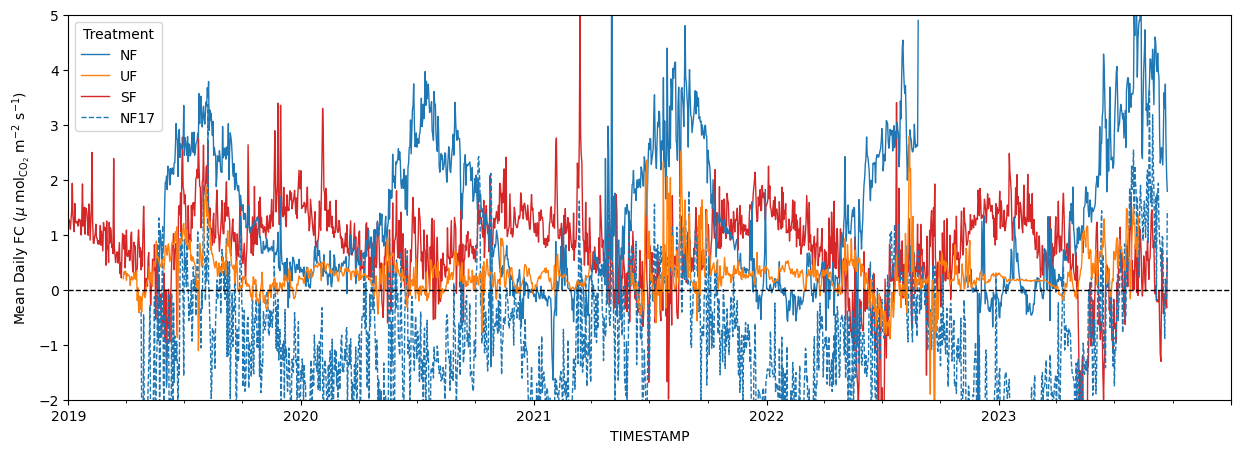

In [83]:
flux_dir = Path('/project/bbtrees/afox18/EddyProConfigEditor/workflows/Postproc_all')

nf3 = (
    pd.read_csv(flux_dir / 'BB-NF-3m_proc_.tsv', sep="\t", skiprows=[1], na_values=-9999, parse_dates=["Date Time"])
    .rename(columns={"Date Time":"TIMESTAMP", 'NEE_uStar_f':'NEE_NF3'})
    .set_index("TIMESTAMP")
    [["NEE_NF3"]]
)
nf17 = (
    pd.read_csv(flux_dir / 'BB-NF-17m_proc_.tsv', sep="\t", skiprows=[1], na_values=-9999, parse_dates=["Date Time"])
    .rename(columns={"Date Time":"TIMESTAMP", 'NEE_uStar_f':'NEE_NF17'})
    .set_index("TIMESTAMP")
    [["NEE_NF17"]]
)
uf3 = (
    pd.read_csv(flux_dir / 'BB-UF-3m_proc_.tsv', sep="\t", skiprows=[1], na_values=-9999, parse_dates=["Date Time"])
    .rename(columns={"Date Time":"TIMESTAMP", 'NEE_uStar_f':'NEE_UF3'})
    .set_index("TIMESTAMP")
    [["NEE_UF3"]]
)
sf4 = (
    pd.read_csv(flux_dir / 'BB-SF-4m_proc_.tsv', sep="\t", skiprows=[1], na_values=-9999, parse_dates=["Date Time"])
    .rename(columns={"Date Time":"TIMESTAMP", 'NEE_uStar_f':'NEE_SF4'})
    .set_index("TIMESTAMP")
    [["NEE_SF4"]]
)

with open(flux_dir / 'BB-UF-3m_proc_.tsv', 'r') as f:
    colnames = f.readline().split('\t')
    units = f.readline().split('\t')
units = {c:u for c, u in zip(colnames, units)}
print(units["NEE_uStar_f"])


NEE = nf3.merge(uf3, left_index=True, right_index=True, how="outer").merge(sf4,left_index=True, right_index=True, how="outer").merge(nf17, left_index=True, right_index=True, how="outer")

NEE = NEE.where((NEE > -10) & (NEE < 10))

ax = NEE[["NEE_NF3", "NEE_UF3"]].groupby(pd.Grouper(freq="1d")).mean().plot(figsize=(15,5), lw=1, zorder=1);
NEE[["NEE_SF4"]].groupby(pd.Grouper(freq="1d")).mean().plot(lw=1, zorder=0, ax=ax, color="C3");
NEE[["NEE_NF17"]].groupby(pd.Grouper(freq="1d")).mean().plot(lw=1, zorder=0, ax=ax, color="C0", linestyle="--");
plt.hlines(0, *plt.xlim(), "k", "--", lw=1, zorder=2)
plt.legend(title="Treatment", labels=["NF", "UF", "SF", "NF17"])
plt.ylim(-2, 5)
plt.ylabel("Mean Daily FC ($\mu\ \mathrm{mol_{CO_2}}\ \mathrm{m^{-2}\ s^{-1}}$)")




-


Text(0, 0.5, 'Daily ET ($\\mathrm{mm\\ day^{-1}}$)')

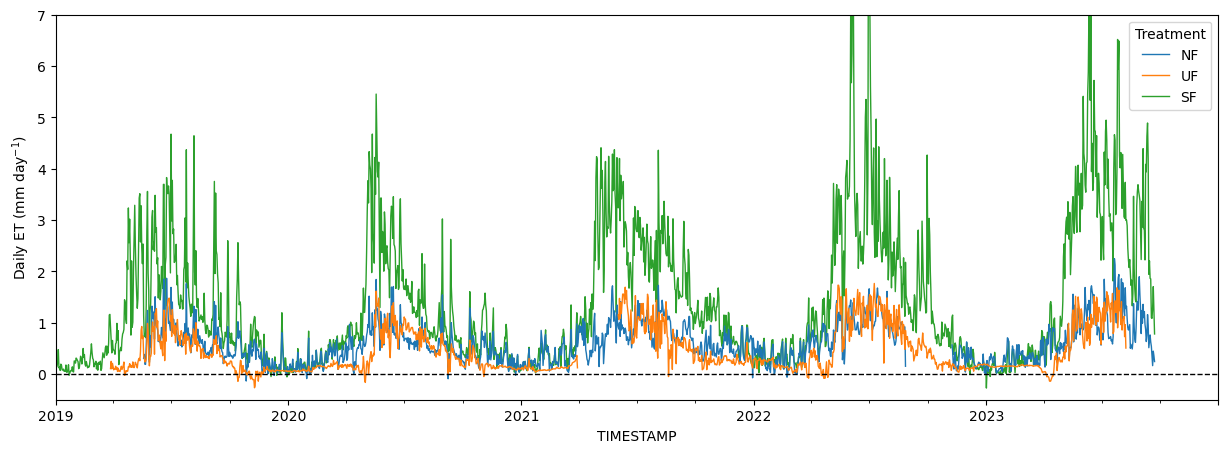

In [59]:
flux_dir = Path('/project/bbtrees/afox18/EddyProConfigEditor/workflows/Postproc_all')

nf3 = (
    pd.read_csv(flux_dir / 'BB-NF-3m_proc_.tsv', sep="\t", skiprows=[1], na_values=-9999, parse_dates=["Date Time"])
    .rename(columns={"Date Time":"TIMESTAMP", 'LE_uStar_f':'LE_NF3'})
    .set_index("TIMESTAMP")
    [["LE_NF3"]]
)
uf3 = (
    pd.read_csv(flux_dir / 'BB-UF-3m_proc_.tsv', sep="\t", skiprows=[1], na_values=-9999, parse_dates=["Date Time"])
    .rename(columns={"Date Time":"TIMESTAMP", 'LE_uStar_f':'LE_UF3'})
    .set_index("TIMESTAMP")
    [["LE_UF3"]]
)
sf4 = (
    pd.read_csv(flux_dir / 'BB-SF-4m_proc_.tsv', sep="\t", skiprows=[1], na_values=-9999, parse_dates=["Date Time"])
    .rename(columns={"Date Time":"TIMESTAMP", 'LE_uStar_f':'LE_SF4'})
    .set_index("TIMESTAMP")
    [["LE_SF4"]]
)

with open(flux_dir / 'BB-UF-3m_proc_.tsv', 'r') as f:
    colnames = f.readline().split('\t')
    units = f.readline().split('\t')
units = {c:u for c, u in zip(colnames, units)}
print(units["LE_uStar_f"])


LE = nf3.merge(uf3, left_index=True, right_index=True, how="outer").merge(sf4,left_index=True, right_index=True, how="outer")
lambda_v = 2260e3  # J kg-1
rho_w = 997 # kg m-3
LE = LE*(1/lambda_v)*(1/rho_w)*86400*1000

# LE = LE.where((LE > -10) & (LE < 10))

ax = LE[["LE_NF3", "LE_UF3"]].groupby(pd.Grouper(freq="1d")).mean().plot(figsize=(15,5), lw=1, zorder=1);
LE[["LE_SF4"]].groupby(pd.Grouper(freq="1d")).mean().plot(lw=1, zorder=0, ax=ax);
plt.hlines(0, *plt.xlim(), "k", "--", lw=1, zorder=2)
plt.legend(title="Treatment", labels=["NF", "UF", "SF"])
plt.ylim(-0.5, 7)
plt.ylabel("Daily ET ($\mathrm{mm\ day^{-1}}$)")


